# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f'{url}{city_url}')
        city_weather = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tomohon
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | port saint john's
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | kupang
Processing Record 8 of Set 1 | bacalar
Processing Record 9 of Set 1 | columbia falls
Processing Record 10 of Set 1 | el alto
Processing Record 11 of Set 1 | mitu
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | jose mariano jimenez
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | bayanhongor
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | thinadhoo
Processing 

Processing Record 37 of Set 4 | dryden
Processing Record 38 of Set 4 | palikir - national government center
Processing Record 39 of Set 4 | banda aceh
Processing Record 40 of Set 4 | northam
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | faya-largeau
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | mccook
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | campo ramon
Processing Record 47 of Set 4 | anastacio
Processing Record 48 of Set 4 | qamdo
Processing Record 49 of Set 4 | benghazi
Processing Record 0 of Set 5 | happy valley-goose bay
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | rongelap
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | kulhudhuffushi
Processing Record 6 of Set 5 | aleksandrovsk-sakhalinskiy
Processing Record 7 of Set 5 | shiqian
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | 

Processing Record 28 of Set 8 | nadi
Processing Record 29 of Set 8 | garachico
Processing Record 30 of Set 8 | ayaviri
Processing Record 31 of Set 8 | pestravka
Processing Record 32 of Set 8 | filadelfia
Processing Record 33 of Set 8 | paita
Processing Record 34 of Set 8 | naze
Processing Record 35 of Set 8 | ahau
City not found. Skipping...
Processing Record 36 of Set 8 | umluj
Processing Record 37 of Set 8 | calbuco
Processing Record 38 of Set 8 | walvis bay
Processing Record 39 of Set 8 | hami
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | noosa heads
Processing Record 42 of Set 8 | laascaanood
Processing Record 43 of Set 8 | lubang
Processing Record 44 of Set 8 | lerwick
Processing Record 45 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 46 of Set 8 | prado
Processing Record 47 of Set 8 | keflavik
Processing Record 48 of Set 8 | velizh
Processing Record 49 of Set 8 | san luis de la loma
Processing Record 0 of Set 9 | houlton
Processing Recor

Processing Record 20 of Set 12 | cabedelo
Processing Record 21 of Set 12 | nagqu
Processing Record 22 of Set 12 | rock springs
Processing Record 23 of Set 12 | shush
Processing Record 24 of Set 12 | salalah
Processing Record 25 of Set 12 | singarayakonda
Processing Record 26 of Set 12 | zastron
Processing Record 27 of Set 12 | santo domingo de los colorados
Processing Record 28 of Set 12 | sao gabriel da cachoeira
Processing Record 29 of Set 12 | ballina
Processing Record 30 of Set 12 | nyurba
Processing Record 31 of Set 12 | maceio
Processing Record 32 of Set 12 | veraval
Processing Record 33 of Set 12 | yeppoon
Processing Record 34 of Set 12 | tauranga
Processing Record 35 of Set 12 | samastipur
Processing Record 36 of Set 12 | richards bay
Processing Record 37 of Set 12 | lichinga
Processing Record 38 of Set 12 | bandundu
Processing Record 39 of Set 12 | kayangel
Processing Record 40 of Set 12 | massaguet
Processing Record 41 of Set 12 | puerto deseado
Processing Record 42 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tomohon,1.3346,1.3346,24.52,77,39,0.66,ID,1701733566
1,aasiaat,68.7098,68.7098,-13.42,90,95,2.68,GL,1701733568
2,taulaga,-11.0553,-11.0553,28.55,76,86,6.46,AS,1701733571
3,guerrero negro,27.9769,27.9769,21.55,40,42,3.86,MX,1701733574
4,port saint john's,-31.6229,-31.6229,18.72,88,100,4.60,ZA,1701733578


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tomohon,1.3346,1.3346,24.52,77,39,0.66,ID,1701733566
1,aasiaat,68.7098,68.7098,-13.42,90,95,2.68,GL,1701733568
2,taulaga,-11.0553,-11.0553,28.55,76,86,6.46,AS,1701733571
3,guerrero negro,27.9769,27.9769,21.55,40,42,3.86,MX,1701733574
4,port saint john's,-31.6229,-31.6229,18.72,88,100,4.60,ZA,1701733578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

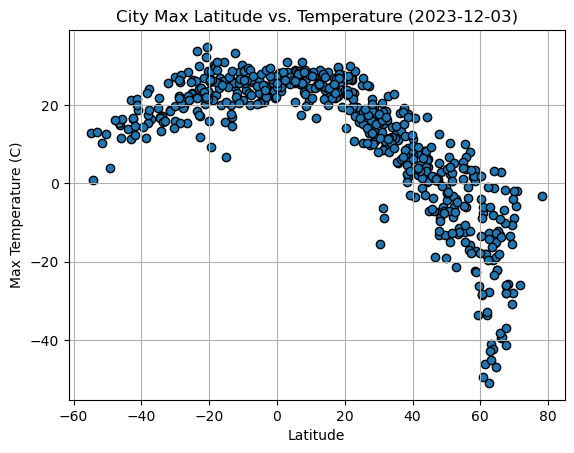

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

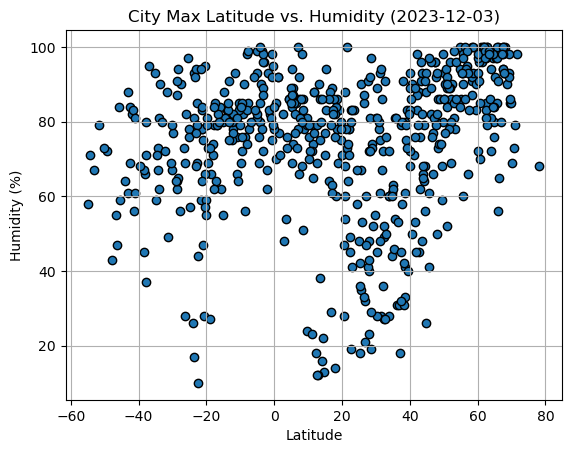

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

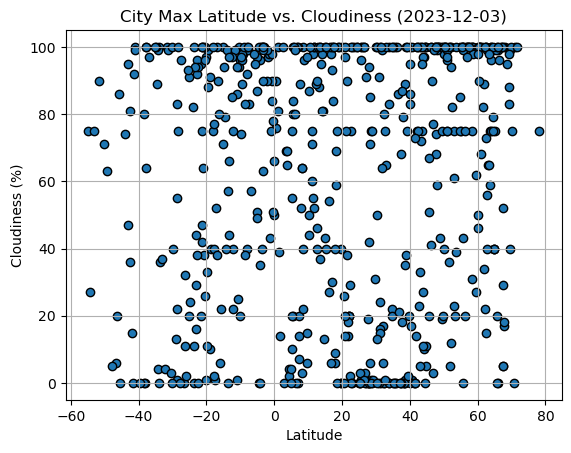

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

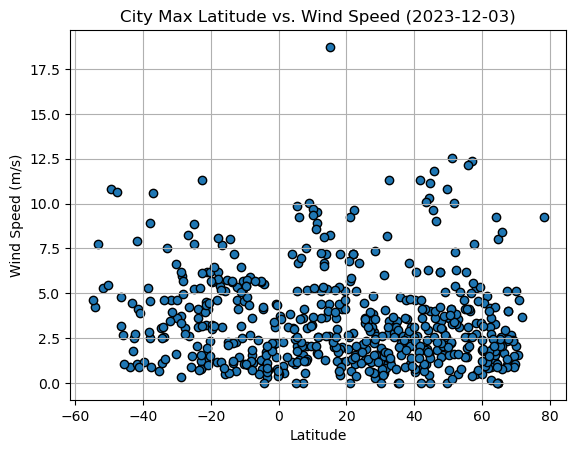

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression(item1,item2):
    output = linregress(item1,item2)
    return output

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tomohon,1.3346,1.3346,24.52,77,39,0.66,ID,1701733566
1,aasiaat,68.7098,68.7098,-13.42,90,95,2.68,GL,1701733568
3,guerrero negro,27.9769,27.9769,21.55,40,42,3.86,MX,1701733574
7,bacalar,18.6667,18.6667,28.06,78,75,4.12,MX,1701733324
8,columbia falls,48.3725,48.3725,2.85,86,100,1.54,US,1701733568


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,taulaga,-11.0553,-11.0553,28.55,76,86,6.46,AS,1701733571
4,port saint john's,-31.6229,-31.6229,18.72,88,100,4.60,ZA,1701733578
5,grytviken,-54.2811,-54.2811,0.88,71,27,4.22,GS,1701733582
6,kupang,-10.1667,-10.1667,30.32,84,20,1.03,ID,1701733584
9,el alto,-4.2714,-4.2714,22.81,80,35,5.49,PE,1701733594


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8711394029937933


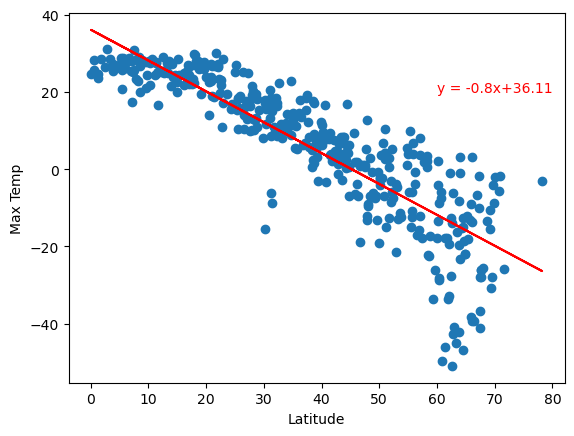

In [15]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (60,20),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.6051192366403272


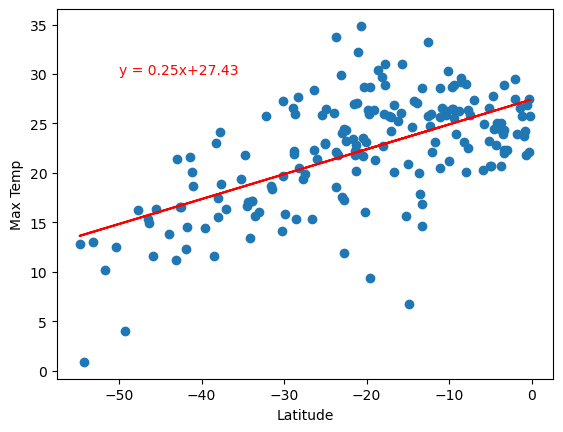

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-50,30),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()


**Discussion about the linear relationship:** 
In northen hemispheres, there's an inverse relationship between latitudes and max temperatures. The more towards the north we go, the smaller the max temperature is. However, it is the oppositte for the southern hemispheres, the more we go towards the north (the equator), the bigger the max temperature can be. This shows why the correlation coefficient is negative for the northern hemisphere while it is posibite for the southern one.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3441327908605729


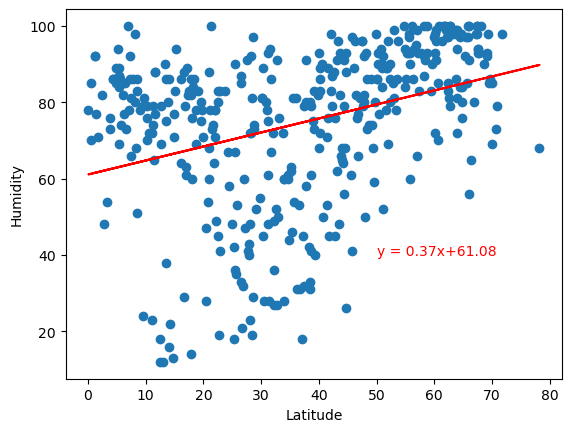

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (50,40),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.34373698911686895


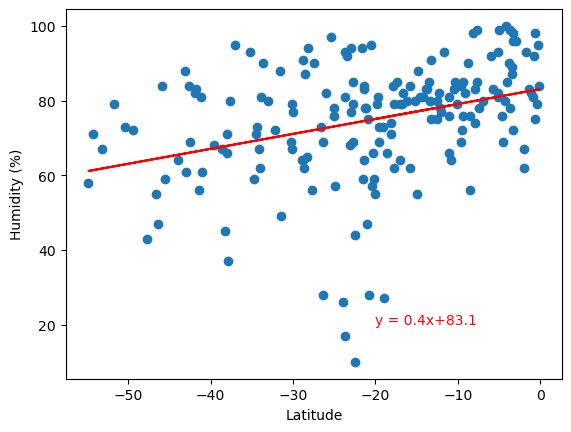

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-20,20),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:**
For both hemimsphers, the relationship between the humidity level and the latitude is slightly positive. Explaining that the more toward the north we go, the more the humidity level increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.18749030780411466


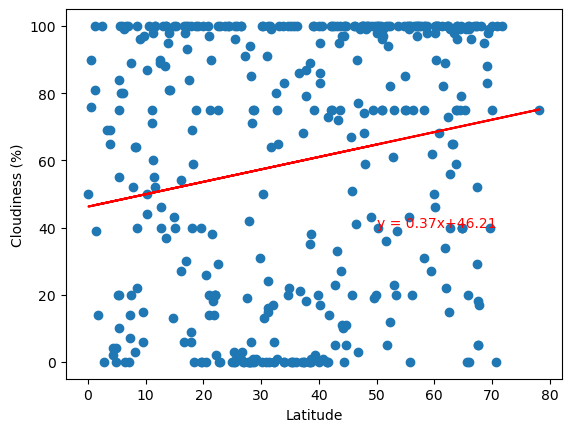

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (50,40),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.23210240261018675


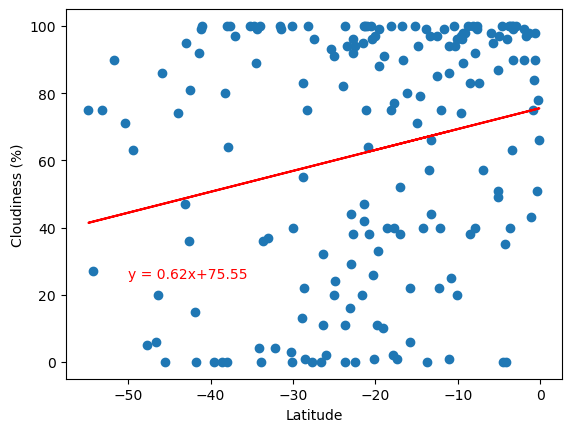

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-50,25),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:** 
For both hemisphers, we see a positive relationship with the Latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.07826205022210131


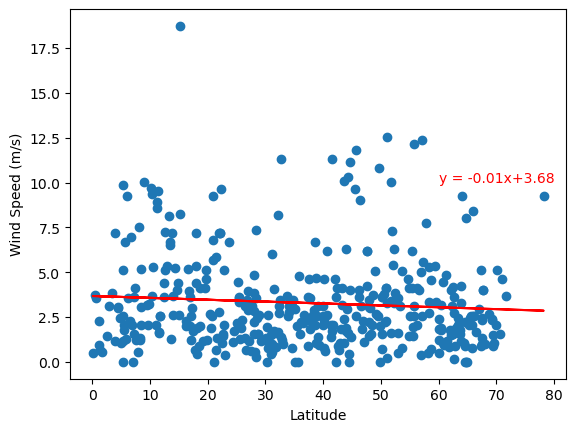

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (60,10),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:-0.2509402047381564


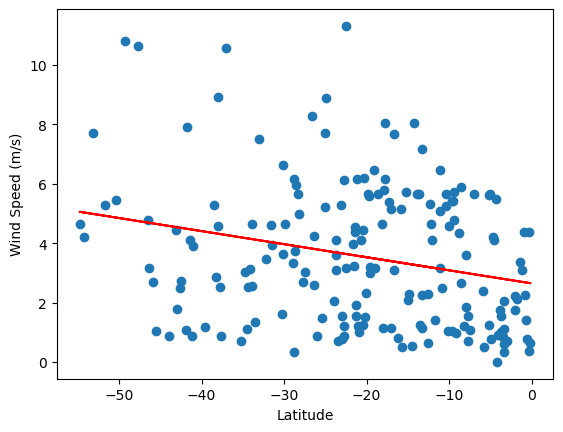

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-20,12),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE